# *Wine Quality Dataset*
O repositório foi escolhido por estes motivos:
1. Output claro: a variável ``quality`` já vem bem definida (valores de 0 à 10);
2. Problema flexível: é facilmente aplicável numa regressão para prever a qualidade, mas também para classificação entre vinho tinto e vinho branco!
3. Variáveis independentes: variáveis contínuas que, à primeira vista, aparentam não terem grandes correlações de um ponto de vista **lógico**, o que é bom para regressões.
4. Dataset **real** e moderadamente limpo, sem valores ausentes segundo o website.
5. Dataset de tamanho ideal e com importação já dividida para a variável alvo, facilitando o treinamento dos modelos de Machine Learning.

OBS: Vou utilizar diferentes cores para cada seção, para facilitar quando "scrollando" pelo arquivo ipynb. 


---

## <span style="color: pink;"> **1. Análise Eploratória de Dados** </span>

<span style="color: pink;"> === Importando Bibliotecas e Dataset ===


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

red_wine = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    sep=";",
)
white_wine = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
    sep=";",
)

# Classificando os tipos de vinho em uma coluna type
red_wine["type"] = "red"
white_wine["type"] = "white"

df = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


---

### <span style="color: pink;"> **Analisando Distribuições (Histogramas)** 

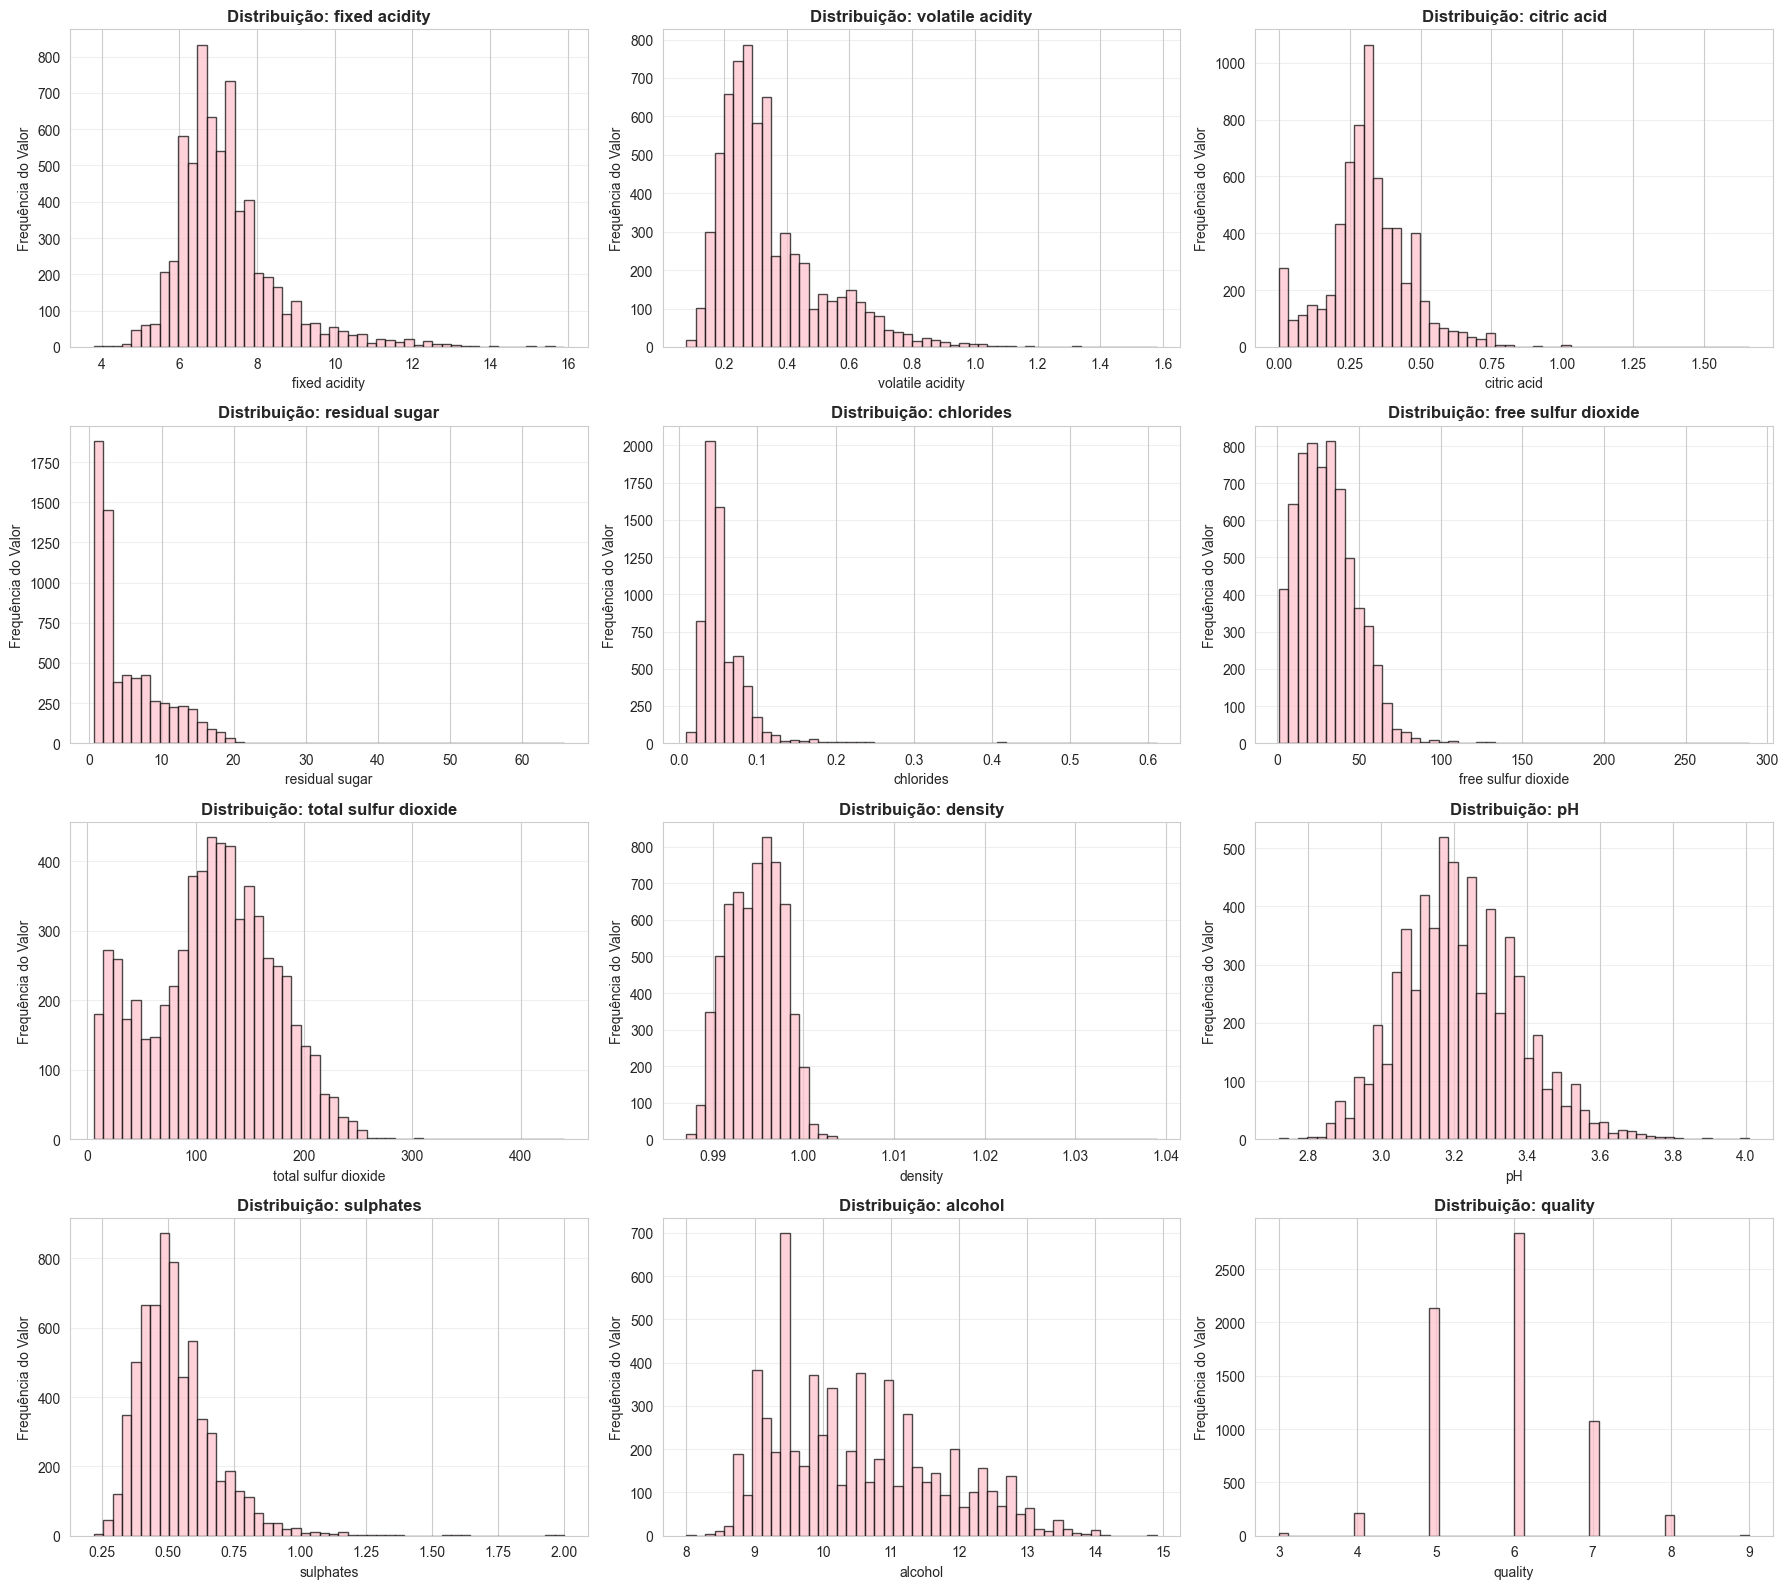

In [3]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (15, 10)
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = (
    axes.ravel()
)  # "achatando" os eixos unidimmensionalmente para iterar com apenas 1 loop for

numeric_cols = df.select_dtypes(
    include=[np.number]
).columns  # apenas as colunas numéricas

# Plots para cada coluna
for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col], bins=50, edgecolor="black", alpha=0.7, color="pink")
    axes[idx].set_title(f"Distribuição: {col}", fontsize=12, fontweight="bold")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Frequência do Valor")
    axes[idx].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

<span style="color: pink;"> **Observações**:
- <span style="color: pink;"> *Assimetria*: Muitas variáveis químicas (como `residual_sugar`, `sulphates`, `total_sulfur_dioxide`) apresentam uma distribuição assimétrica, com cauda longa à direita. Isso indica que a maioria dos vinhos tem valores baixos, mas alguns têm valores extremamente altos (prováveis outliers)
- <span style="color: pink;"> *Qualidade*: Segue distribuição muito próxima da normal (picos centrais), concentrada entre 5-7, indicando que vinhos extremos (muito ruins ou excelentes) são raros
- <span style="color: pink;"> *pH e densidade*: Mostram distribuições um pouco mais simétricas, indicando que são características químicas mais estáveis

<span style="color: pink;"> A maior atenção aqui são as variáveis assimétricas, talvez seja necessário algum tipo de tratamento para treinar o modelo de Machine Learning com elas (normalizações ou funções logarítimicas)

---
### <span style="color: pink;"> **Análise de Outliers (Boxplots)** 

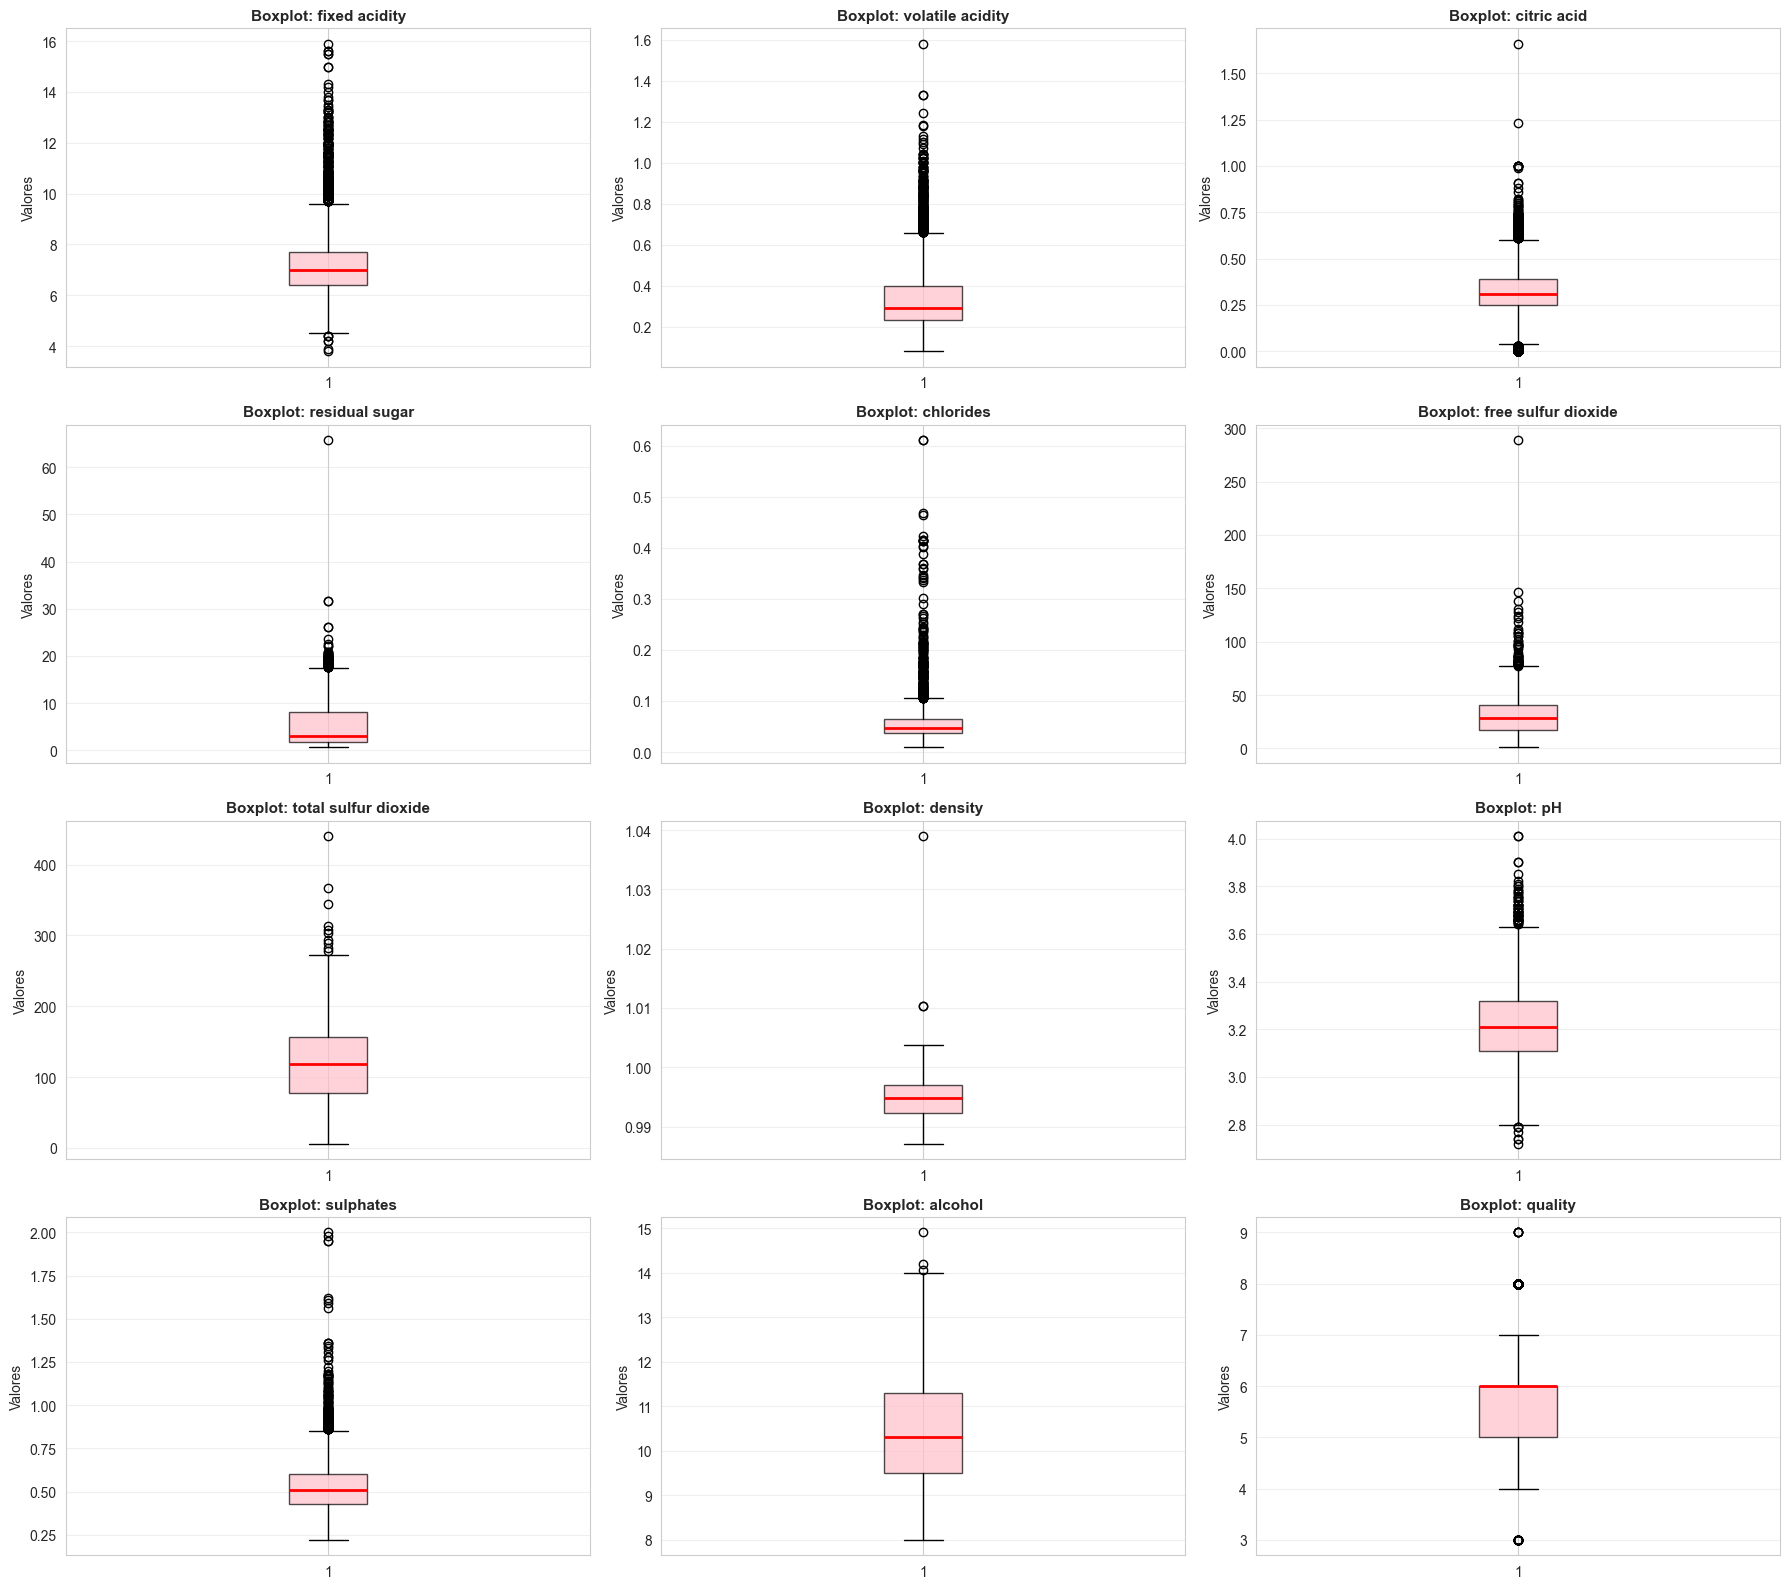

In [4]:
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(
        df[col],
        vert=True,
        patch_artist=True,
        boxprops=dict(facecolor="pink", alpha=0.7),
        medianprops=dict(color="red", linewidth=2),
    )
    axes[idx].set_title(f"Boxplot: {col}", fontsize=11, fontweight="bold")
    axes[idx].set_ylabel("Valores")
    axes[idx].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

<span style="color: pink;"> **Observações:**

- <span style="color: pink;"> ***MUITOS*** *outliers*: Variáveis como `residual_sugar`, `chlorides`, `free_sulfur_dioxide` e `total_sulfur_dioxide` têm muitos pontos fora das caixas
- <span style="color: pink;"> ***Outliers não são erros***: No contexto de vinho, esses valores extremos podem representar vinhos únicos (vinhos doces com muito açúcar residual, por exemplo), não são erros necessariamente

<span style="color: pink;"> **O que fazer então?**

- <span style="color: pink;"> Não removerei todos os outliers - eles podem ser legítimos e dão variabilidade aos nossos dados
- <span style="color: pink;"> Tentarei usar métodos robustos a outliers (Tratamento IQR)
- <span style="color: pink;"> Outliers em variáveis químicas provavelmente indicam diferentes estilos de vinho.

---




### <span style="color: pink;"> **Tratando Outliers (IQR)**

<span style="color: pink;">  O método de identificação de interquartis tira proveito do conceito dos boxplots e "cerca" os dados para definir outliers fora de certo alcance. A imagem abaixo  *(fonte: https://www.scribbr.com/statistics/outliers/)* explica visualmente a lógica:

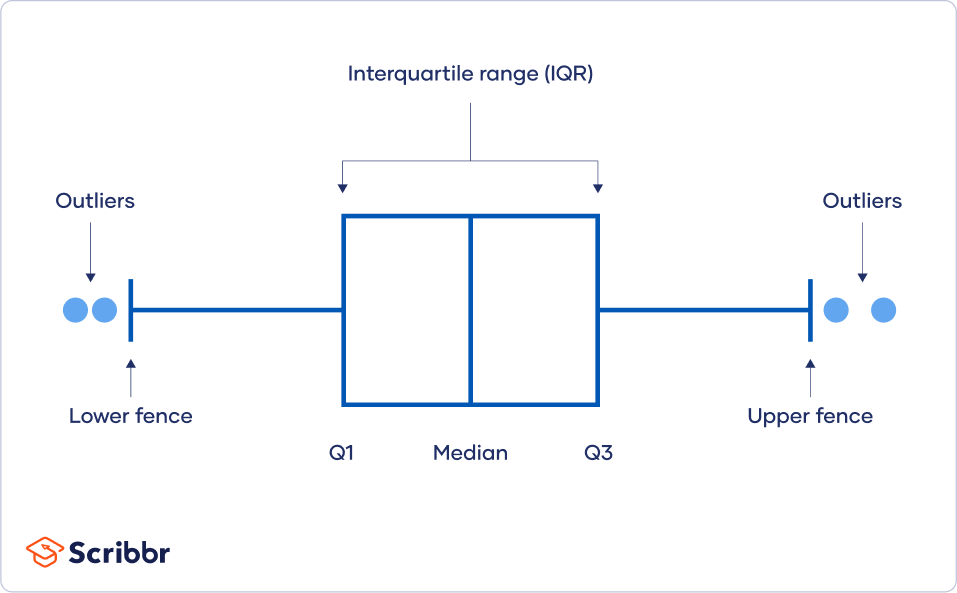

In [5]:
def outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    outliers_inferiores = df[df[column] < lower_fence]
    outliers_superiores = df[df[column] > upper_fence]
    return len(outliers_inferiores), len(outliers_superiores), lower_fence, upper_fence

<span style="color: pink;"> A função acima implementa a lógica de IQR para encontrar a quantidade de outliers, agora, vamos analisá-los: 

In [6]:
outlier_arr = []
for col in numeric_cols:
    n_outliers_inf, n_outliers_sup, lf, uf = outliers_IQR(df, col)
    outlier_arr.append(
        {
            "Variável": col,
            "Num Outliers Inf": n_outliers_inf,
            "Num Outliers Sup": n_outliers_sup,
            "Limite Inferior": round(lf, 2),
            "Limite Superior": round(uf, 2),
        }
    )

outlier_df = pd.DataFrame(outlier_arr)
outlier_df

,Variável,Num Outliers Inf,Num Outliers Sup,Limite Inferior,Limite Superior
0,fixed acidity,7,350,4.45,9.65
1,volatile acidity,0,377,-0.02,0.66
2,citric acid,279,230,0.04,0.60
3,residual sugar,0,118,-7.65,17.55
4,chlorides,0,286,-0.00,0.11
5,free sulfur dioxide,0,62,-19.00,77.00
6,total sulfur dioxide,0,10,-41.50,274.50
7,density,0,3,0.99,1.00
8,pH,7,66,2.80,3.64
9,sulphates,0,191,0.18,0.86


<span style="color: pink;"> Há algumas observações principais a serem feitas:

- <span style="color: pink;"> *Limites Inferiores*: alguns limites ficaram com valores negativos por conta da distribuição e formato dos dados em valores muito baixos, mas isso não influencia na identificação de outliers, pois significa que se o valor é baixo, muito provavelmente está dentro dos quartis desejados e não foi identificado nenhum valor negativo, o que reforça que o dataset trabalha com dados reais.

- <span style="color: pink;"> *Acidez Fixa e Acidez Volátil*: apesar de aparentarem terem muitos outliers, estes são valores que não queremos remover. Após uma breve pesquisa sobre o que cada uma representa no vinho e analisar nossos histogramas, todos os valores parecem plausíveis e dentro da normalidade. Serão "outliers" muito interessantes de se analisar, pois em níveis muito baixos (geralmente abaixo de 0,6-0,9 g/L, que é o caso da maioria do dataset), pode contribuir para a complexidade e frescor. No entanto, em excesso (os 377 outliers), confere aromas indesejáveis de vinagre, aceto balsâmico, verniz ou cola, comprometendo a qualidade e o aroma do vinho, ou seja, poderemos investigar se os vinhos muito ácidos recebem avaliações piores ou não.

- <span style="color: pink;"> *pH*: é o único campo que **talvez** seja justificável remover ou substituir outliers, mais especificamente os inferiores. A faixa geral de pH no vinho segundo pesquisas que fiz no google é de 2,5 a 4,5, com vinhos brancos tendo pH mais baixo, em torno de 3,0 a 3,5 e vinhos tintos com pH mais alto, em torno de 3,5 a 4,0. Seria possível substituir os pH's abaixo de 2,5 por esse limite, mas são tão poucos que não acho que vão influenciar no resultado final. Quanto aos valores acima da nossa cerca, provavelmente são normais tendo em vista a pesquisa que fiz.

- <span style="color: pink;"> *Outras Variáveis*: É normal haverem vinhos cítricos e não-cítricos, mais doces ou mais amargos, etc, então muitos valores não-citados que foram classificados como outliers aqui provavelmente são apenas tipos únicos de vinho.

<span style="color: pink;"> **Conclusão**: antes me assustei com os boxplots, mas a verdade é que os vinhos do dataset são extremamente variados, estando em sua maioria com valores dentro da variabilidade normal para vinhos segundo minhas buscas no google. Então, decidi que não vou remover outliers, mas será necessário transformar as escalas de alguns valores, como já mencionei antes.

---


### <span style="color: pink;"> **Correlações**

<span style="color: pink;"> Abaixo, estão dois heatmaps de correlações, analisamos quais variáveis são simétricas e a força das correlações para que façamos boas regressões. Fiz um heatmap para cada tipo de vinho, pois podem haver critérios diferentes para avaliar a qualidade dependendo do tipo.

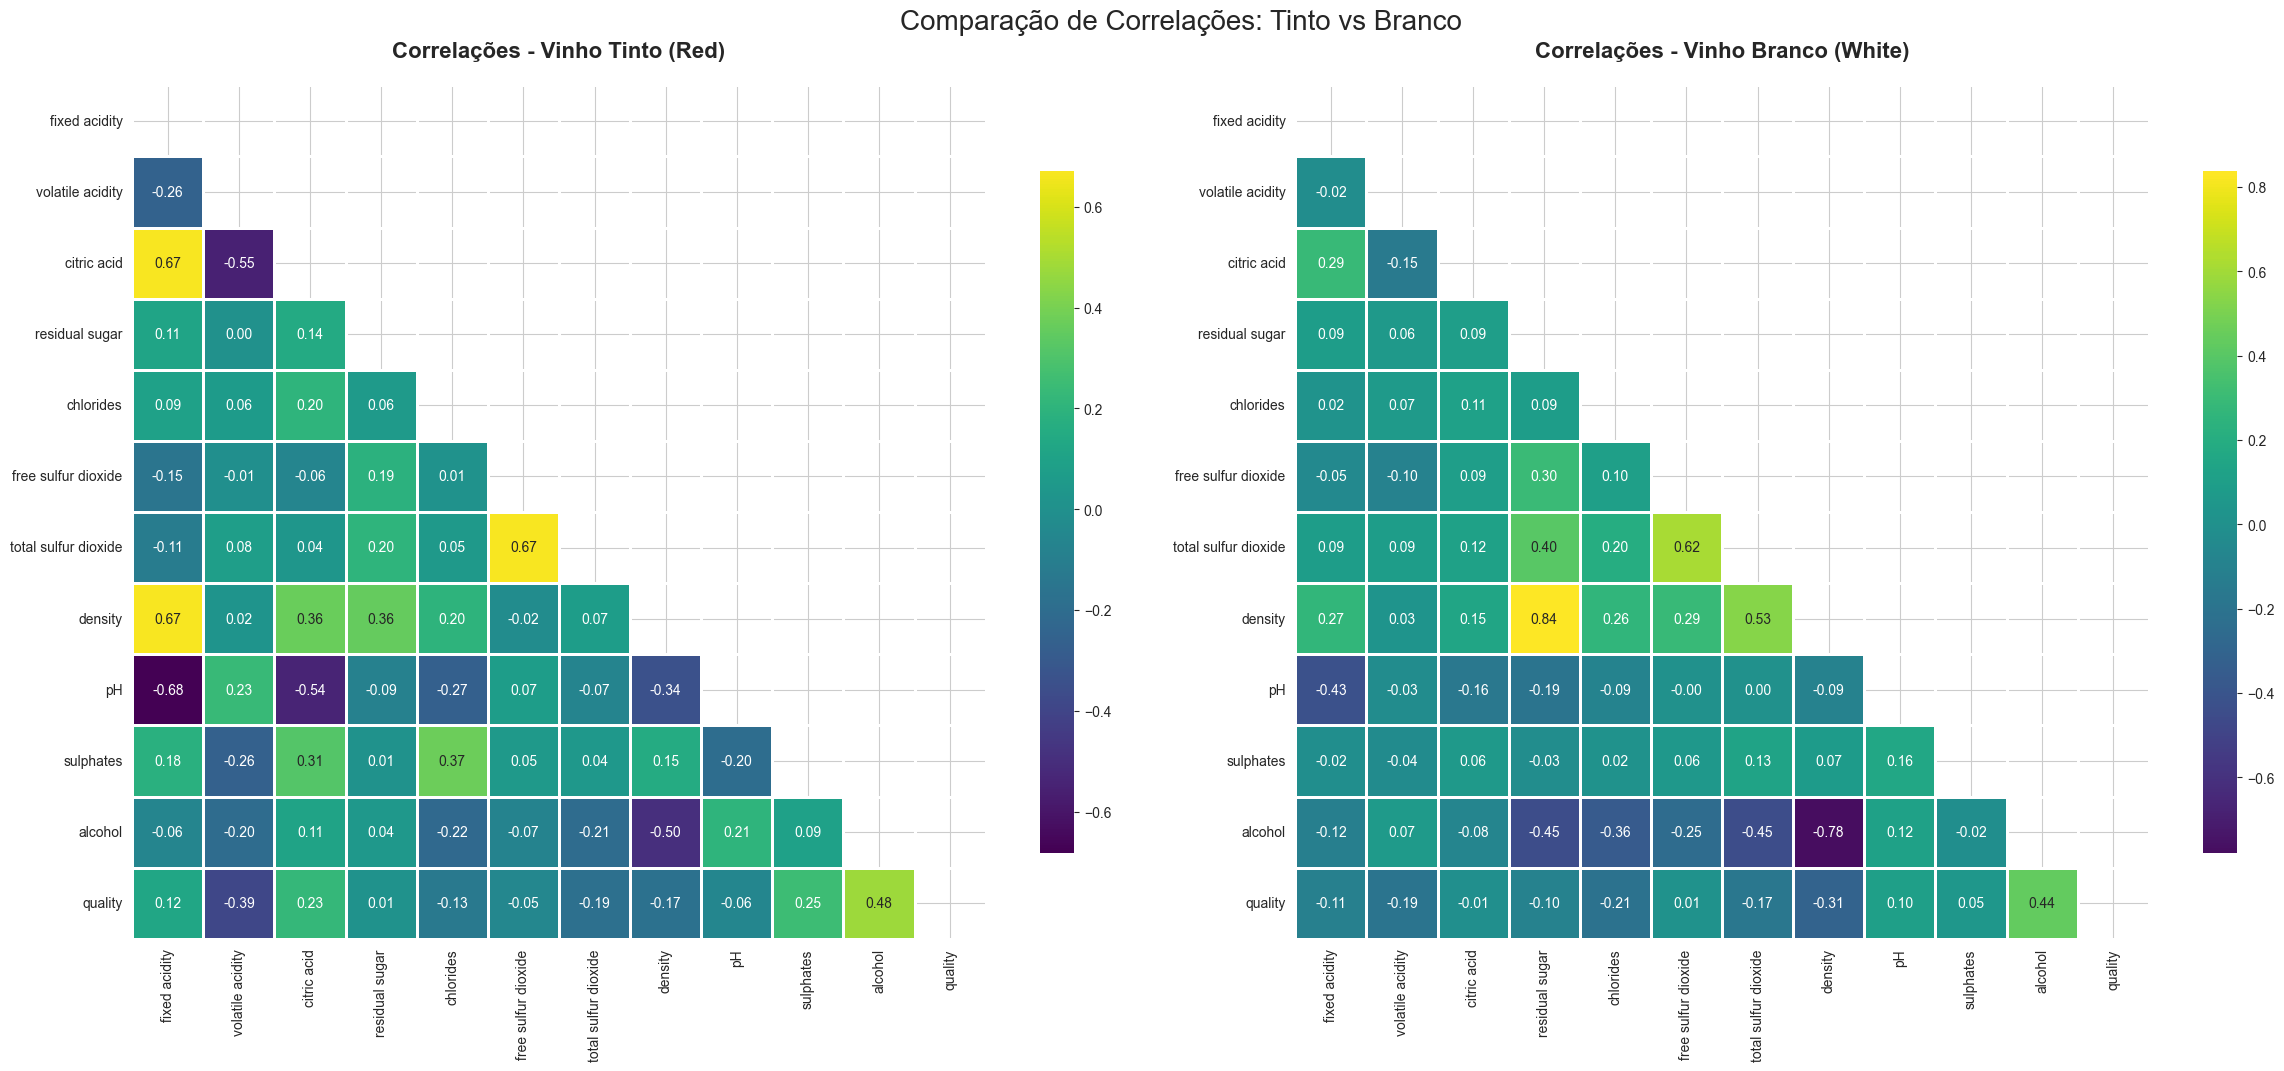

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
wine_types = ["red", "white"]
titles = ["Correlações - Vinho Tinto (Red)", "Correlações - Vinho Branco (White)"]

for i, wine_type in enumerate(wine_types):
    df_filtered = df[df["type"] == wine_type]
    correlation_matrix = df_filtered[numeric_cols].corr()

    # Cria uma máscara responsável por remover a metade duplicada das correlações
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    sns.heatmap(
        correlation_matrix,
        mask=mask,
        annot=True,
        fmt=".2f",
        cmap="viridis",
        center=0,
        square=True,
        linewidths=1,
        cbar_kws={"shrink": 0.8},
        ax=axes[i]
    )  # Deixei sem o vmin e o vmax pois fica mais fácil de visualizar os valores mais relevantes
    
    axes[i].set_title(
        f"{titles[i]}", fontsize=16, fontweight="bold", pad=20
    )

plt.suptitle("Comparação de Correlações: Tinto vs Branco", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

<span style="color: pink;"> A escolha de dividir entre tipos foi o correto, antes havia feito o mesmo heatmap para o dataset inteiro, juntando os tipos de vinhos, mas não obtive bons resultados nas correlações, enquanto dessa forma temos valores muito mais norteadores.

<span style="color: pink;"> **Correlações do Vinho Tinto:**

* <span style="color: pink;"> Podemos perceber de cara correlações **positivas** médias/fortes entre `density` e `fixed acidity`; entre `free sulfur dioxide` e `total sulfur dioxide`; entre `fixed acidity` e `citric acid`. Destas, a mais óbvia é a entre os níveis de dióxido de enxofre, então na hora de realizar regressões não vou incluir ambas as colunas, apenas uma.

* <span style="color: pink;"> Quanto às correlações **negativas** médias/fortes entre `fixed acidity` e `pH`; entre `citric acid` e `pH`; entre `citric acid` e `volatile acidity`. Isso indica que provavelmente não utilizarei a coluna de pH nem a de ácido cítrico de para regressões, pois já há duas colunas indicativas de acidez (`fixed acidity` e `volatile acidity`) e o pH também é um dos indicativos para medir acidez. Já a coluna de ácido cítrico seria redundante pois além da correlação negativa forte com pH, possui a positiva que citei antes com `fixed acidity`. Por fim, a última correlação negativa relevante é entre `alcohol` e `density`, mostrando que em pelo menos metade dos casos as variáveis seguem uma relação inversa, com uma crescendo enquanto a outra diminui, isso provavelmente ocorre porque o álcool etílico (etanol) gerado na fermentação é menos denso que a água presente no vinho. Apesar disso, não é uma correlação forte o suficiente para justificar a inutilização de uma das colunas.

* <span style="color: pink;"> Por fim, separei a análise de `quality` por ser nossa variável alvo. Todas as correlações são fracas demais, com exceção de `volatile acidity` e `alcohol` sendo as únicas médias, uma negativa e outra positiva, respectivamente. Para a regressão linear simples com certeza vou utilizar o nível alcoólico do vinho, para a múltipla, todas menos as que citei no parágrafo anterior que acabam sendo redundantes. 

<span style="color: pink;"> **Correlações Vinho Branco:**

<span style="color: pink;"> O comportamento físico-químico do vinho branco se mostrou distinto do tinto. Enquanto o tinto é governado pelas relações de acidez, o branco parece ser governado pela relação Açúcar/Álcool/Densidade.

* <span style="color: pink;"> A correlação positiva mais gritante (e perigosa para a regressão) é entre `density` e `residual sugar` (0.84). É uma correlação fortíssima, muito maior que no vinho tinto. Acredito que o açúcar residual seja o principal agente para aumentar a densidade do líquido. Como essa correlação é quase linear, incluir ambas em uma regressão múltipla causaria problemas de multicolinearidade. Logo, optarei por manter `residual sugar` e remover `density`, já que são causa e consequência respectivamente. Também, assim como no vinho tinto, temos a relação óbvia entre `free sulfur dioxide` e `total sulfur dioxide` (0.62). A lógica se mantém: utilizaremos apenas uma delas para evitar redundância.

* <span style="color: pink;"> A correlação negativa mais forte é entre `density ` e `alcohol` (-0.78), diferença fundamental em relação ao tinto. No vinho tinto essa relação era moderada (-0.50), mas aqui é forte. Isso mostra um comportamento claro da densidade: ela é puxada para cima pelo açúcar e para baixo pelo álcool, ou seja `density` no vinho branco não traz informação nova, ela é praticamente uma função matemática de quanto álcool e açúcar existem no vinho. Assim, fica óbvio que emover a coluna density é quase obrigatório para o modelo de vinho branco funcionar bem.

* <span style="color: pink;"> Diferente do vinho tinto, as relações de acidez (`fixed acidity`, `volatile acidity`, `citric acid` e `pH`) são bem mais fracas ou difusas no vinho branco. Não há aquela "troca óbvia" que permitiria descartar o pH ou o ácido cítrico com tanta segurança quanto no tinto, pois as correlações são menores (ex: `Fixed Acidity` vs `pH` é apenas -0.43, contra -0.68 no tinto). Talvez valha a pena testar manter mais variáveis de acidez aqui inicialmente.

* <span style="color: pink;"> Já a variável alvo (`quality`) apresenta algumas correlações. Em relação a `alcohol` (0.44), novamente, o teor alcoólico é o maior indicador positivo de qualidade. Vinhos com maior teor alcoólico tendem a ter notas maiores. Também há a coluna `density` (-0.31), a qual tem uma correlação negativa relevante, mas como decidimos que ela é redundante (espelho do álcool e açúcar), ela confirma que não precisamos dela. Por fim, temos a coluna `chlorides` (-0.21) e a coluna `volatile acidity` (-0.19), as quais ao contrário do tinto, onde a acidez volátil era o grande "vilão" da qualidade (-0.39), no branco ela importa menos. Porém, os cloretos (sais) aparecem aqui como um fator negativo leve que não existia no tinto.

---

### <span style="color: pink;"> **Análise da Distribuição da Qualidade por Tipo de Vinho**

<span style="color: pink;"> Plotando a qualidade em relação ao tipo de vinhos no formato de boxplot e histograma.

C:\Users\pavi1\AppData\Local\Temp\ipykernel_5924\1605072631.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='quality', ax=axes[1], palette='pastel')


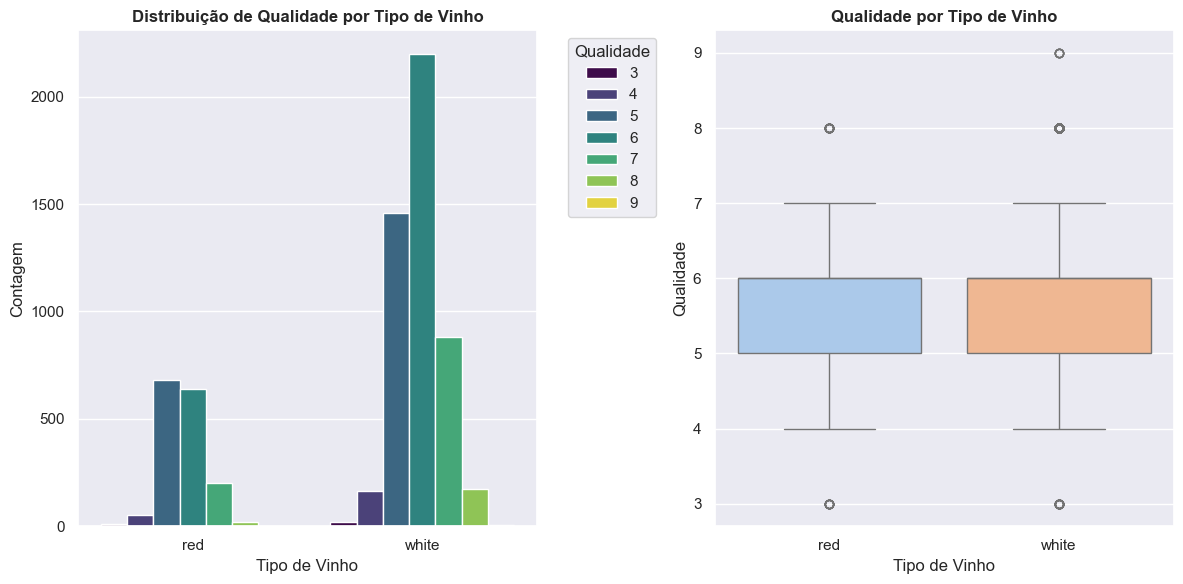

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras (histograma)
sns.countplot(data=df, x='type', hue='quality', ax=axes[0], palette='viridis')

axes[0].set_title('Distribuição de Qualidade por Tipo de Vinho', fontweight='bold')
axes[0].set_xlabel('Tipo de Vinho')
axes[0].set_ylabel('Contagem')
# Ajusta a legenda para fora
axes[0].legend(title='Qualidade', bbox_to_anchor=(1.05, 1), loc='upper left')


# Boxplot
sns.boxplot(data=df, x='type', y='quality', ax=axes[1], palette='pastel')

axes[1].set_title('Qualidade por Tipo de Vinho', fontweight='bold')
axes[1].set_xlabel('Tipo de Vinho')
axes[1].set_ylabel('Qualidade')

plt.tight_layout()
plt.show()

<span style="color: pink;"> Podemos perceber que vinhos brancos e tintos têm distribuições de qualidade semelhantes, com ambos concentrando-se numa qualidade média (5 a 6), sendo poucos os vinhos que recebem notas extremas (3 ou 9). Isso demonstra que o tipo de vinho não é um preditor muito importante para avaliar a qualidade, sendo mais associado ao comportamento químico. Então, a coluna `type` não é muito relevante para a regressão em si, mas será necessária para separar o dataset devido aos diferentes precursores de qualidade para cada tipo de vinho como vimos anteriormente.

---

### <span style="color: pink;"> **Transformações Logarítmicas**
<span style="color: pink;"> Por fim, para encerrar a EDA, vou fazer algumas transformações em certas variáveis que possuem um comportamento assimétrico, com o intuito de tentar normalizar seu comportamento de modo a melhorar as futuras regressões.

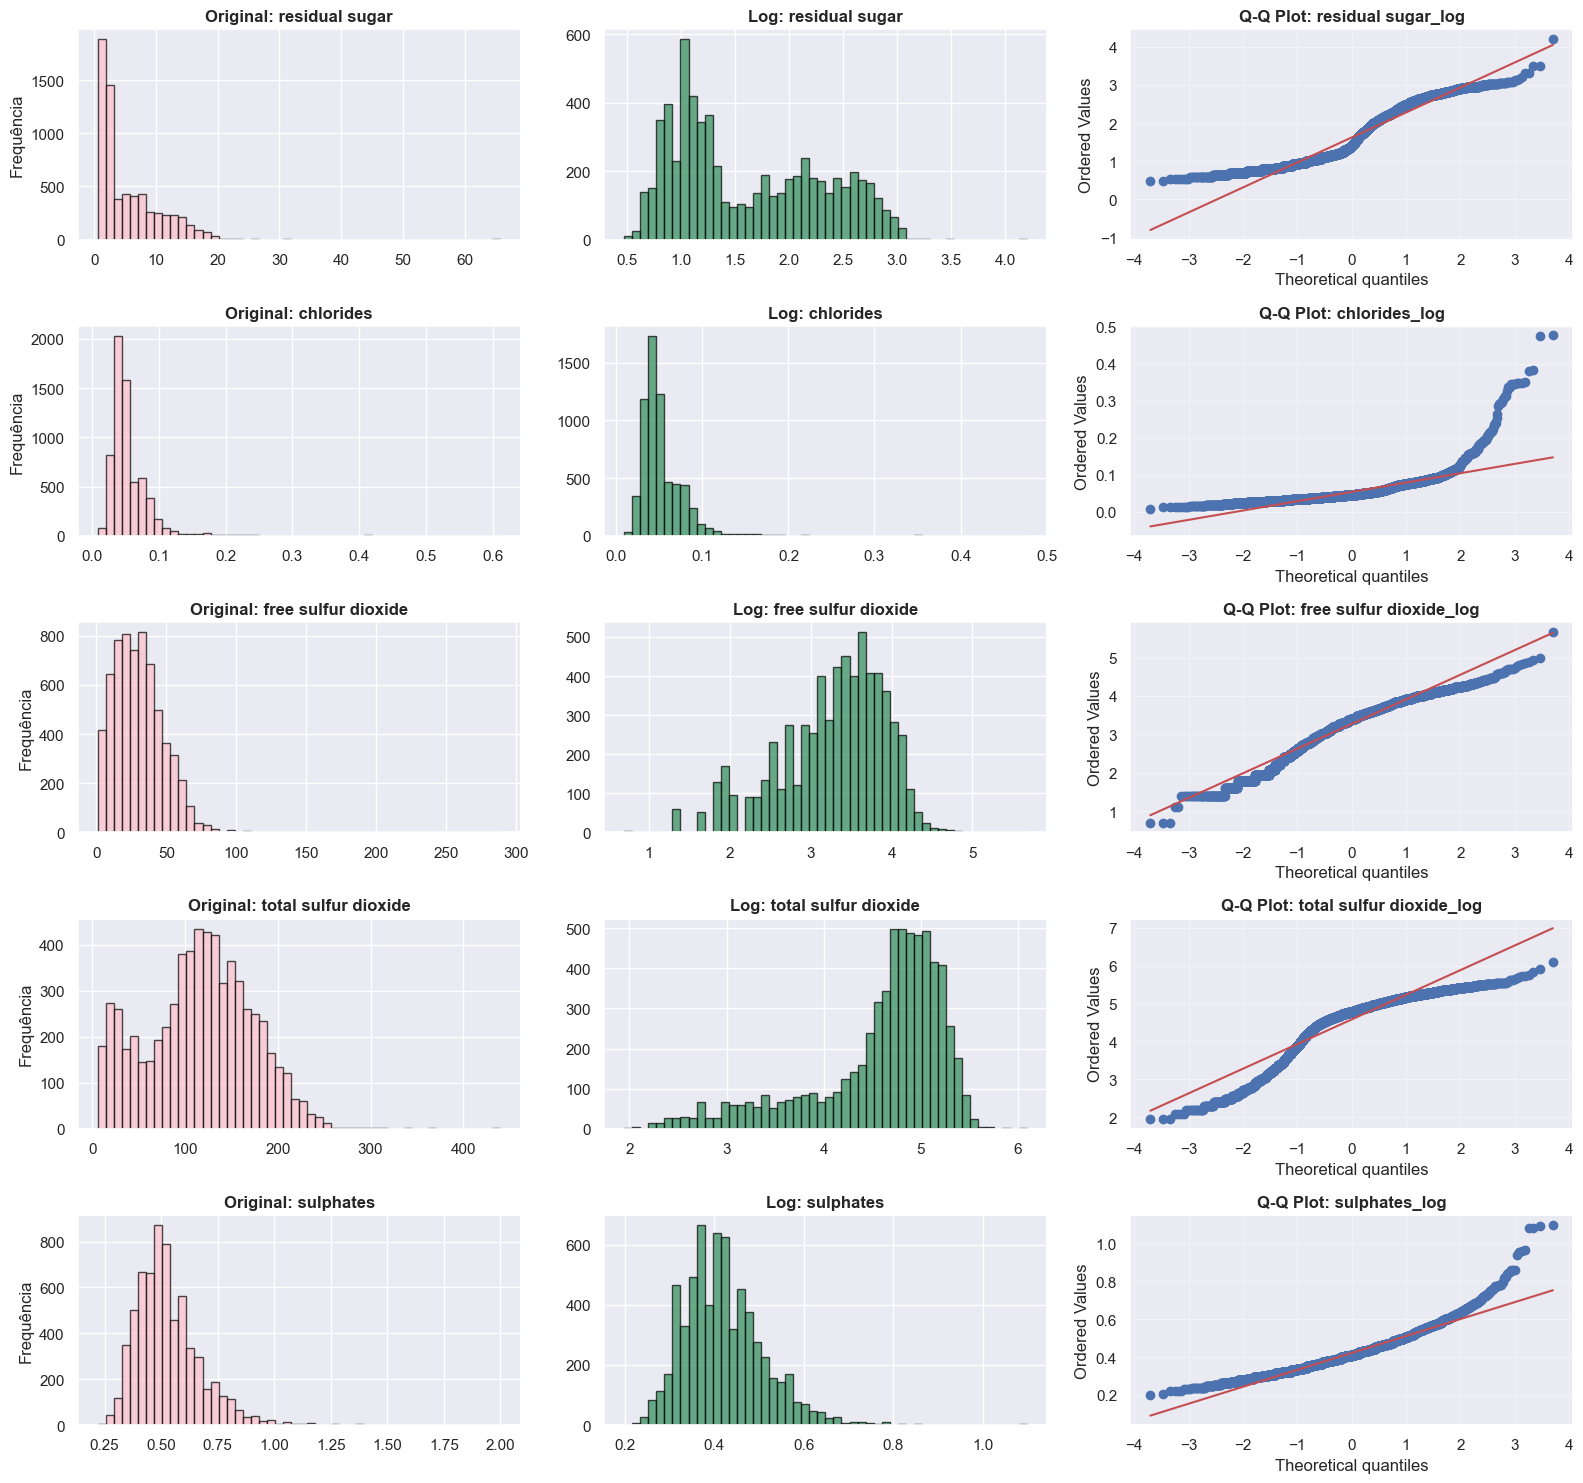

In [9]:
# Variáveis para transformar (assimétricas identificadas)
skewed_vars = ['residual sugar', 'chlorides', 'free sulfur dioxide', 
               'total sulfur dioxide', 'sulphates']

df_transformed = df.copy()
for var in skewed_vars:
    # Log (adicionamos uma pequena constante para evitar log(0))
    df_transformed[f'{var} log'] = np.log1p(df[var])

# Comparação de gráficos
fig, axes = plt.subplots(len(skewed_vars), 3, figsize=(16, 3*len(skewed_vars)))

for idx, var in enumerate(skewed_vars):
    # Histograma Original
    axes[idx, 0].hist(df[var], bins=50, edgecolor='black', alpha=0.7, color='pink')
    axes[idx, 0].set_title(f'Original: {var}', fontweight='bold')
    axes[idx, 0].set_ylabel('Frequência')
    
    # Histograma Transformado
    axes[idx, 1].hist(df_transformed[f'{var} log'], bins=50, edgecolor='black', 
                      alpha=0.7, color='seagreen')
    axes[idx, 1].set_title(f'Log: {var}', fontweight='bold')
    
    # Q-Q Plot para identificar se os dados seguem a distribuição normal
    stats.probplot(df_transformed[f'{var} log'], dist="norm", plot=axes[idx, 2])
    axes[idx, 2].set_title(f'Q-Q Plot: {var}_log', fontweight='bold')
    axes[idx, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

<span style="color: pink;"> Analisando os Q-Q plots (que comparam a distribuição dos dados com uma distribuição normal), percebemos algumas melhorias distintas. Variáveis como `sulphates` e `free sulfur dioxide` tiveram seus comportamentos quase normalizados após a transformação logarítmica, com os pontos muito próximos à linha vermelha de referência (o sulphates, inclusive, já apresentava boa simetria original, mas foi uma tentativa de melhorar o que já era bom).

<span style="color: pink;"> Entretanto, outras variáveis não parecem terem sido muito alteradas pela transformação. O `total sulfur dioxide` sofreu uma inversão curiosa, a cauda longa que era à direita inverteu-se para a esquerda. Enquanto o residual sugar é o caso mais estranho, pois o histograma revela uma distribuição com dois picos. Isso provavelmente acontece pois há a existência de dois subgrupos distintos nos dados: vinhos tintos e brancos e, como vimos anteriormente, o açúcar residual é importante para o vinho branco. Esse cenário gerou um Q-Q plot em formato de "S" que o logaritmo não consegue resolver sozinho.

<span style="color: pink;"> Assim, só resta fazer um teste de normalidade para confirmar as observações.

In [10]:
# Teste de normalidade com Shapiro-Wilk
# Passei uma sample de 500 pois com uma sample muito grande o teste detecta qualquer desvio microscópico da normalidade 
# perfeita e retorna um p-value minúsculo, o que tira a sua utilidade prática. Então usei um quarto do valor máximo recomendado por
# este documento do medium.com https://medium.com/@data-overload/the-shapiro-wilk-test-a-guide-to-normality-testing-d730e820d1a8
sample_size = min(500, len(df))
sample_idx = np.random.choice(df.index, sample_size, replace=False)

results = []
for var in skewed_vars:
    _, p_original = stats.shapiro(df.loc[sample_idx, var])
    _, p_transformed = stats.shapiro(df_transformed.loc[sample_idx, f'{var} log'])
    
    results.append({
        'Variável': var,
        'Skewness Original': df[var].skew().round(2),
        'Skewness Log': df_transformed[f'{var} log'].skew().round(2),
        'p-value Original': f'{p_original:.4f}',
        'p-value Log': f'{p_transformed:.4f}'
    })

results_df = pd.DataFrame(results)
results_df

,Variável,Skewness Original,Skewness Log,p-value Original,p-value Log
0,residual sugar,1.44,0.41,0.0000,0.0000
1,chlorides,5.40,4.48,0.0000,0.0000
2,free sulfur dioxide,1.22,-0.72,0.0000,0.0000
3,total sulfur dioxide,-0.00,-1.35,0.0000,0.0000
4,sulphates,1.80,1.10,0.0000,0.0000


<span style="color: pink;"> O teste diz que **nenhuma** das distribuições é normal (p-value < 0.05), o que provavelmente é verdade, mas precisamos que apenas sejam próximas da normalidade. Então, neste caso, é melhor confiarmoms na observação do que no valor que espera a perfeição. Assim, como podemos ver pelas variáveis de skeweness, as transformações diminuiram a assimetria na maioria dos casos, aproximando-a de 0. `residual sugar`, `chlorides` e `sulphates` tiveram comportamentos melhorados, então ainda é válido transformá-los. Já `total sulfur dioxide` e `free sulfur dioxide` se afastaram mais ainda da normalidade, então provavelmente não devemos transformar estas colunas.

---

### <span style="color: pink;"> **Fim da EDA** 

<span style="color: pink;"> Estou muito satisfeito com o que consegui descobrir acerca do dataset. Acredito que com os insights adquiridos durante esta análise já será possível gerar modelos muito melhores de ML do que se houvesse feito direto o aprendizado de máquina sem verificar os dados antes. 

---

## <span style="color: Chocolate;"> **2. Regressão Linear Simples**


In [11]:
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
import sys

sys.path.append('../src/data_preparation.py')